# Предположения линейной регрессии

<img style="float:right; max-width:400px" src="imgs/illustration.jpeg" width="60%" />

Предположения линейной регрессии - это основные условия, которые должны быть выполнены для получения надежных и валидных результатов в анализе отношений между независимой переменной $X$ и зависимой переменной $Y$. Предположения гарантируют, что выбранная нами модель линейной регрессии соответствует данным и что предсказания будут точными и надежными в определенных интервалах.

Предположения можно проверить визуально, используя графики, или с использованием статистических тестов (больше о статистических тестах на следующих занятиях).

**Предположения L.I.N.E.** - 4 основных предположения должны быть выполнены, чтобы убедиться, что регрессионная модель подходит для данной проблемы:

- [Линейность](#1.-Линейность)
- [Независимость ошибок](#2.-Independence-of-errors)
- [Нормальность ошибок](#3.-Normality-of-errors)
- [Равенство дисперсии](#4.-Equal-variance)

Далее мы рассмотрим все 4 предположения, используя набор данных о домах в канадском городе Уиндзор (1987 г.). Мы создаем модель линейной регрессии, которая предсказывает стоимость дома на основе площади участка.


Загружаем необходимые библиотеки и набор данных:


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/housing.csv', sep=',')
df.head()

,price,lotsize(m^2),bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,74700,658.4799,3,1,1,1,1,1,0,0,2,1
1,85000,652.4388,3,1,1,1,0,1,0,1,2,1
2,68500,650.5800,3,1,2,1,0,1,0,0,0,0
3,82900,650.5800,3,1,1,1,0,1,0,0,2,1
4,86000,641.2860,3,2,1,1,1,1,0,0,0,1


## 1. Линейность
Линейность - предположение справедливо, когда отношение между $X$ и $Y$ является линейным ✅.

Создаем модель линейной регрессии, которая предсказывает цену дома $Y$ на основе площади участка $X$.
Определяем параметры модели $y = ax + b$, пересечение и наклон, как и на предыдущих занятиях.

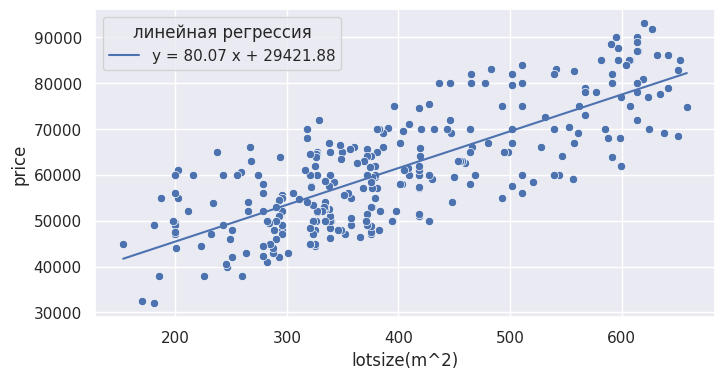

In [4]:
x = df['lotsize(m^2)'].values.reshape(-1,1)
y = df['price']
from sklearn.linear_model import LinearRegression

# вычислить наклон и пересечение для наилучшей подгонки линии (best fit)
model = LinearRegression()
model.fit(x, y)

slope = model.coef_.item()
intercept = model.intercept_.item()

# предсказать y для каждого x
y_pred = model.predict(x)

# построить данные и линию наилучшей подгонки
sb.scatterplot(data=df, x='lotsize(m^2)', y='price');
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend(title='линейная регрессия')
plt.show()

### $Y$ vs $\hat{Y}$
С предыдущего графика видим, что отношение между $X$ и $Y$ является линейным. Чтобы удостовериться, сравним `y` и `y_pred`, то есть $Y$ и $\hat{Y}$.

Точки на графике должны быть близкими к прямой $x=y$ для точных предсказаний. Большие отклонения могут указывать на то, что линейная модель неадекватна ❌, а небольшие отклонения подтверждают ее адекватность ✅.


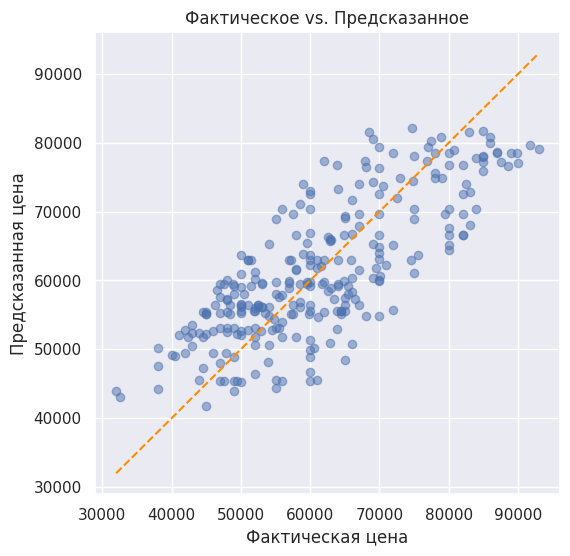

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(y, y_pred, alpha=.5)

# x = y линия
line_coords = np.linspace(np.concatenate([y, y_pred]).min(), np.concatenate([y, y_pred]).max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Фактическое vs. Предсказанное')
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.show()


Поскольку значительных отклонений нет, условие линейности выполняется ✅.

(Если бы мы заметили значительные расхождения на графике, мы бы пришли к выводу, что линейная модель неверный выбор.)

## 2. Independece of errors \ Независимость ошибок
Независимость ошибок - предположение справедливо, когда ошибки статистически независимы.

Проверяется с помощью построения графика остатков (или **резидуалов**).
Если на графике остатков виден явный узор, то предположение нарушено ❌. Предположение считается выполненным, если узора нет ✅.
Тестирование проводится на **остатках**, а не на переменных.

### Остатки
Напомним: остатки - это оценки ошибок в выборке данных. Это разница между реальным и предсказанным значением $ e = y - \hat{y}$.
Пример остатков: Оранжевой линией показывается отклонение $\hat{y_i}$ от реального значения $y_i$.

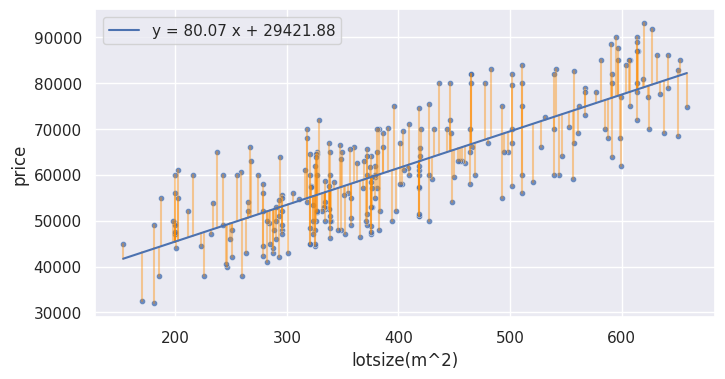

In [6]:
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='darkorange', linestyle='-', alpha=0.4)

sb.scatterplot(data=df, x='lotsize(m^2)', y='price', alpha=0.8, s=20)
plt.plot(x, y_pred, 'b', label=f'y = {slope:.2f} x + {intercept:.2f}')
plt.legend()
plt.show()

Инкапсулируем код в функцию, которая вычисляет остаток для каждой `y` и `y_pred`. 
Отображаем график остатков; на оси x находится предсказанное значение $\hat{y}$, а на оси y - остатки $e$.

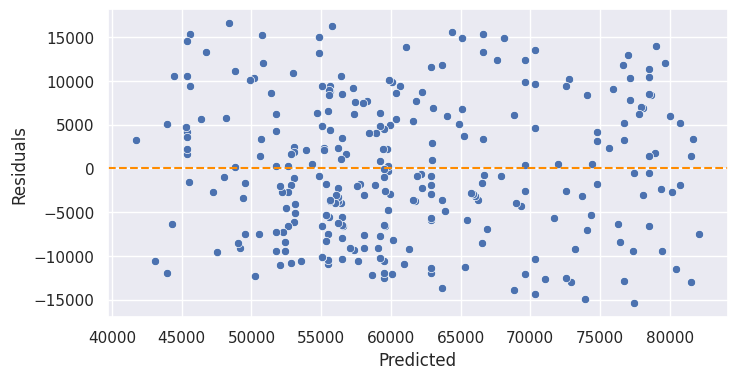

In [8]:
def calculate_residuals(model, features, labels):
    '''Calculates residuals between true value `labels` and predicted value.'''
    y_pred = model.predict(features)
    df_results = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results


df_results = calculate_residuals(model, x, y)
sb.scatterplot(x='Predicted', y='Residuals', data=df_results)
plt.axhline(y=0, color='darkorange', linestyle='--')
plt.show()

Этот график не имеет заметного шаблона, поэтому мы заключаем, что ошибки независимы, то есть предположение соблюдается ✅.

### Статистический тест Дарбина-Уотсона
Альтернативный способ проверить независимость ошибок - использовать статистический тест *Дарбина-Уотсона*. Этот тест проверяет автокорреляцию между остатками; он проверяет, есть ли шаблон в данных.
Толкование автокорреляции для значения $d$:
- 1.5 <= d <= 2: Нет автокорреляции - предположение соблюдается ✅.
- d < 1.5: Положительная автокорреляция - предположение не соблюдается ❌.
- d > 2: Отрицательная автокорреляция - предположение не соблюдается ❌.


In [9]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('положительная автокорреляция')
elif durbinWatson > 2:
    print('отрицательная автокорреляция')
else:
    print('нет автокорреляции (или очень маленькая)')

Durbin-Watson: 1.7798060672748417
нет автокорреляции (или очень маленькая)


Остатки не автокоррелированы, поэтому предположение соблюдается ✅.
*Примечание: мы уже продемонстрировали это с помощью графика остатков, теперь мы просто подтвердили.* 


## 3. Normality of errors \ Нормальность ошибок
Предположение о нормальности ошибок соблюдается, когда выполняются два подпредположения:
1. Среднее значение ошибок равно 0.
2. Ошибки имеют нормальное распределение.

*Примечание: Важно, чтобы среднее значение ошибок было равно 0, важнее, чем нормальное распределение ошибок, поскольку распределение ошибок зависит от выборки данных (подробнее в лекциях).*

### 3.1 Среднее значение ошибок равно 0
Проверяем первое предположение о том, что ошибки имеют среднее значение 0.
Ошибки уже по определению имеют среднее значение 0.
Мы также можем убедиться, что 'e среднее значение ошибок будет равно 0.

In [10]:
df_results['Residuals'].mean()

4.651415760495833e-12

Предыдущее значение очень близко к 0. Почему предыдущее значение не равно точно 0? - Из-за округления чисел (числовая неустойчивость).

Ошибки по определению имеют среднее значение 0, и недостаточно просто вычислить среднее значение. Поэтому мы используем метод - *LOWESS (locally weighted scatterplot smoothing)* - где мы хотим получить как можно более плоскую линию.

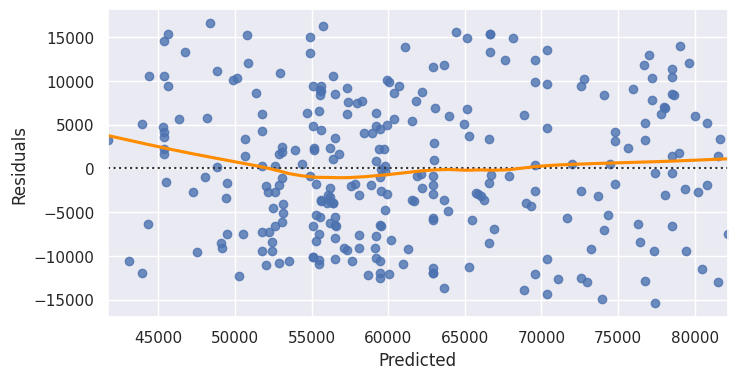

In [11]:
sb.residplot(data=df_results, x='Predicted', y='Residuals', lowess=True,  line_kws={'color': 'darkorange'})
plt.show()

Резидуалы незначительно отклоняются от нуля, поэтому предположение о том, что ошибки распределены вокруг 0, справедливо ✅.

#### 3.2 Ошибки имеют нормальное распределение
Предположение тестируется с использованием гистограммы остатков. 
Остатки на гистограмме должны иметь нормальное распределение - много маленьких и немного больших ошибок, равное количество положительных и отрицательных.
*Гистограмма показывает количество примеров (частоту) в предварительно определенных интервалах (корзинах).*

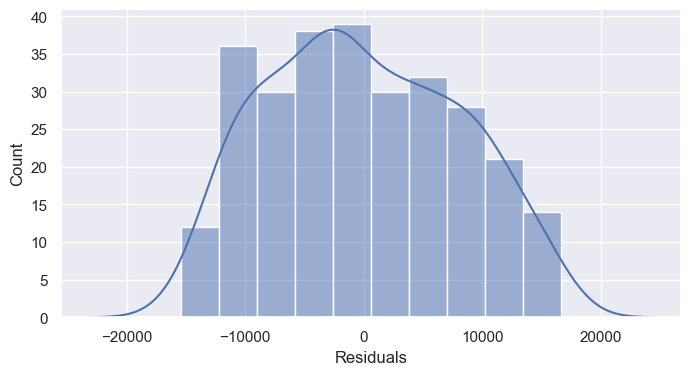

In [10]:
sb.histplot(df_results['Residuals'], kde=True, kde_kws=dict(cut=3));

Кажется, что ошибки не имеют нормальное распределение. Для уверенности мы используем статистический тест *Андерсона-Дарлинга*. Этот тест возвращает p-значение. Интерпретация:
- если p-значение >= порога - распределение нормальное ✅.
- если p-значение < порога - распределение не нормальное ❌.

In [12]:
p_value_thresh = 0.05  # обычно пороговое значение принимается как 5%
from statsmodels.stats.diagnostic import normal_ad

# p-значение
p_value = normal_ad(df_results['Residuals'])[1]
dist_type = 'normal' if p_value >= p_value_thresh else 'non-normal'

if dist_type == 'normal':
    print('Остатки имеют нормальное распределение.')
if dist_type == 'non-normal':
    print('Остатки не имеют нормальное распределение.')
print(p_value)


Остатки не имеют нормальное распределение.
0.00013531311398602962


Из представленного видно, что остатки имеют среднее значение 0, но не имеют нормальное распределение, поэтому предположение не выполняется ❌.
Тем не менее, если объем выборки большой (что именно в нашем случае), мы можем принять это как допустимое предположение, игнорируя тот факт, что остатки не имеют нормальное распределение ✅.


## 4. Равная дисперсия
Предположение о равной дисперсии соблюдается, когда гауссовские ошибки вокруг регрессионной прямой имеют равную дисперсию ✅.
Равную дисперсию можно увидеть на графике остатков - предположение выполняется, когда в остатках нет шаблона.
Тогда распределение остатков вокруг среднего значения 0 имеет равную дисперсию для каждого $x_i$.
Пример на рисунке:

<img style="max-width:800px" src="imgs/equal_variance_example.png" width="60%" />


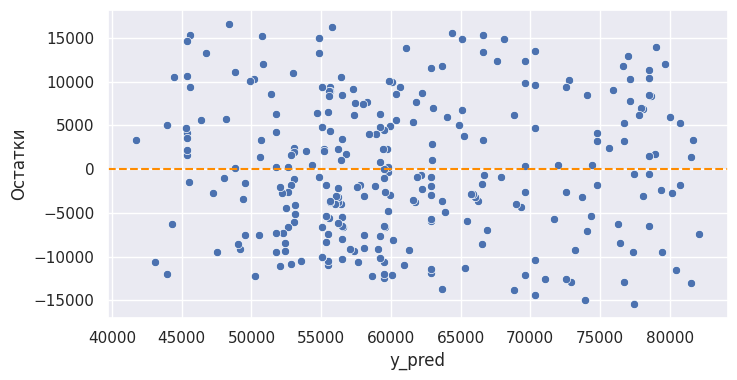

In [14]:
df_results = calculate_residuals(model, x, y)
sb.scatterplot(x='Predicted', y='Residuals', data=df_results)
plt.axhline(y=0, color='darkorange', linestyle='--')
plt.ylabel('Остатки')
plt.xlabel('y_pred')  # предсказанная цена
plt.show()


Поскольку у остатков нет явного шаблона, мы заключаем, что предположение выполняется ✅.

О равенстве дисперсии мы также можем убедиться с помощью теста *Goldfeld-Quandt*. Этот тест возвращает p-значение. Толкование:
- если p-значение >= порога - дисперсия равна ✅.
- если p-значение < порога - дисперсия не равна ❌.

In [15]:
x = sm.add_constant(x)
p_value = sm.stats.het_goldfeldquandt(df_results['Residuals'], x)[1]
dist_type = 'equal' if p_value >= p_value_thresh else 'non-equal'

if dist_type == 'equal': print('Равная дисперсия.')
if dist_type == 'non-equal': print('Неравная дисперсия.')
print(p_value)


Равная дисперсия.
0.9306038347903367


Получаем равную дисперсию, поэтому делаем вывод, что эта предпосылка соблюдается. ✅


# Задачи

Создать регрессионную модель, которая прогнозирует стоимость дома на основе площади участка с использованием [data/housing.csv](data/housing.csv). Затем создать функции для каждого из предположений L.I.N.E. в файле [src/line_pretpostavke.py](src/line_pretpostavke.py):
**TODO 1**: Для каждой из следующих задач загрузить [набор данных о жилье](data/housing.csv), создать регрессионную модель, которая прогнозирует стоимость дома на основе площади участка, и затем:
1. Создать функцию `def linear_assumption(model, features, labels):`, чтобы функция рисовала истинное значение на оси x, а на оси y - предсказанное значение. Предсказанные значения получаются предсказанием модели `model` на основе функций `features`.
1. Создать функцию `def independence_of_errors_assumption(model, features, labels):`, чтобы функция рисовала предсказанное значение на оси x, а на оси y - остатки. Затем проверьте независимость ошибок тестом *Durbin-Watson*.
1. Создать функцию `def normality_of_errors_assumption(model, features, label, p_value_thresh=0.05):`, чтобы функция рисовала гистограмму остатков. Затем проверяет нормальность ошибок тестом *Anderson-Darling*.
1. Создать функцию `def equal_variance_assumption(model, features, labels, p_value_thresh=0.05):`, чтобы функция рисовала предсказанное значение на оси x, а на оси y - остатки. Затем проверьте равенство дисперсии тестом *Goldfeld-Quandt*.

Сделать выводы, какие предположения соблюдаются, а какие нарушены. Дополнить все предыдущие функции параметром `plot=True`, который решает, следует ли отображать график.

**TODO 2**: Создать модель линейной регрессии, которая прогнозирует уровень смертности от рака кожи на основе географической широты с использованием [data/skincancer.csv](data/skincancer.csv). Затем проверить L.I.N.E. предположения (используя функции из **TODO 1**). Сделать выводы о том, какие предположения соблюдаются, а какие нарушены.

**TODO 3**: Создать модель линейной регрессии и проверить L.I.N.E. предположения, как и в **TODO 2**, за исключением того, что вводится высота над уровнем моря вместо географической широты. Сделать выводы о том, какие предположения соблюдаются, а какие нарушены.
